In [1]:
# 1.Load & Prepare Data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
df = pd.read_csv("../data/synthetic/attention_platform_monthly.csv")
df["year_month"] = pd.to_datetime(df["year_month"])

In [18]:
# 2.Select Platform for Forecast (Example: Instagram)
platform = "Instagram"
ts = (
    df[df["platform"] == platform]
    .set_index("year_month")["avg_daily_minutes"]
    .asfreq("MS")
)

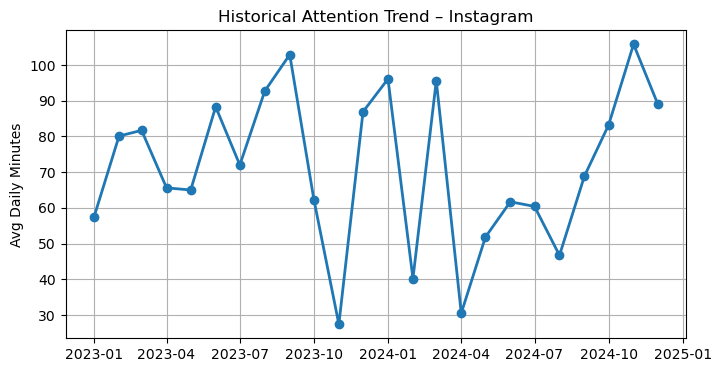

In [20]:
# 3.Plot Historical Attention 
plt.figure(figsize=(8,4))
plt.plot(ts.index, ts.values, marker="o", linewidth=2)
plt.title(f"Historical Attention Trend – {platform}")
plt.ylabel("Avg Daily Minutes")
plt.grid(True)
plt.show()

In [21]:
#4 Fit ARIMA Model
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()

In [22]:
# 5.Forecast Next 12 Months
forecast = model_fit.forecast(steps=12)

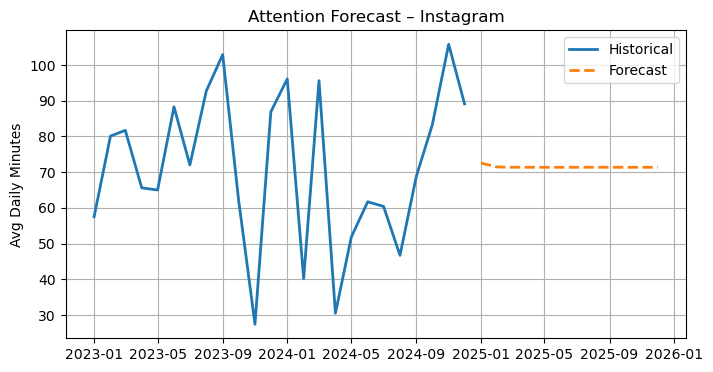

In [23]:
# 6.Plot History + Forecast (FINAL OUTPUT)
plt.figure(figsize=(8,4))
plt.plot(ts.index, ts.values, label="Historical", linewidth=2)
plt.plot(forecast.index, forecast.values, linestyle="--", label="Forecast", linewidth=2)
plt.title(f"Attention Forecast – {platform}")
plt.ylabel("Avg Daily Minutes")
plt.legend()
plt.grid(True)
plt.show()

# Insights

Historical attention shows stable / plateauing behavior

Forecast indicates potential saturation / gradual decline

Fatigue mitigation is required to sustain long-term engagement

(Adjust wording based on your plot.)

✅ PHASE 6 — DONE CHECKLIST

✔ Date handled correctly
✔ Frequency set (MS)
✔ No warnings
✔ History visible
✔ Forecast visible
✔ Business insight written